## Use this driver notebook to interact with HDSAviz modules

In [1]:
import warnings; warnings.filterwarnings('ignore')

from bokeh.plotting import show, output_notebook

import data_processing as dp
import interactive_plots_blake as ip
from plotting import make_plot, make_second_order_heatmap
import network_tools as nt

output_notebook()

sa_dict = dp.get_sa_data()

# print a list of the available output measures
# for key in sa_dict.keys():
#     print key

Loading BokehJS ...

In [2]:
ip.interact_with_make_plot(sa_dict)

In [ ]:
# If you do not want to use the widget interactivity, but still want the ability
# to explore the outputs on tabs, you can use this function and manually pass
# all the arguments to makeplot
ip.plot_all_outputs(sa_dict, min_val=0.01, top=30)

In [2]:
# Plot the second order plots with tabs for all the options
ip.plot_all_second_order(sa_dict, top=5, mirror=True)

In [4]:
# demo of making the 1st and total order sensitivity index plot
df = sa_dict['totaltars'][0]
p = make_plot(df, lgaxis=True, minvalues=0.0, top=30, stacked=True,
              errorbar=True, showS1=True, showST=True)
show(p)

In [5]:
# demo of the basic second order sensitivity index heatmap
sa_dict_second = dp.get_sa_data(
    '../../HDSAviz_data/second_order_results/')
df2 = sa_dict_second['totaltars'][1]
show(make_second_order_heatmap(df2, top=10, mirror=True))

In [6]:
# demo of the basic second order sensitivity index heatmap
# Note that this plot is computationally expensive (doubly so with mirror=True)
# when you plot a large number for top.
df2 = sa_dict['totaltars'][1]
incl_lst = ['Tmax', 'Carbon', 'Hydrogen', 'k38', 'k48', 'k34']
show(make_second_order_heatmap(df2, top=5, mirror=True, include=incl_lst))

In [2]:
dp.find_unimportant_params('S1')
dp.find_unimportant_params('ST');

The following 9 parameters have S1==0 for all outputs:
['k182', 'k202', 'k221', 'k241', 'k315', 'k335', 'k344', 'k384', 'k395'] 

The following 64 parameters have ST==0 for all outputs:
['k100', 'k113', 'k120', 'k122', 'k123', 'k125', 'k126', 'k131', 'k132', 'k133', 'k134', 'k135', 'k137', 'k143', 'k144', 'k145', 'k147', 'k151', 'k152', 'k153', 'k154', 'k155', 'k182', 'k195', 'k202', 'k216', 'k217', 'k218', 'k219', 'k220', 'k221', 'k222', 'k231', 'k237', 'k241', 'k246', 'k249', 'k258', 'k260', 'k279', 'k282', 'k283', 'k285', 'k306', 'k315', 'k335', 'k344', 'k346', 'k367', 'k368', 'k369', 'k370', 'k372', 'k380', 'k384', 'k390', 'k395', 'k60', 'k64', 'k72', 'k74', 'k76', 'k98', 'k99'] 



Created a graph with 27 vertices and 351 edges.
Vertices are the top 40 ST values greater than 0.01.
Only S2 values (edges) greater than 0.0 are included.


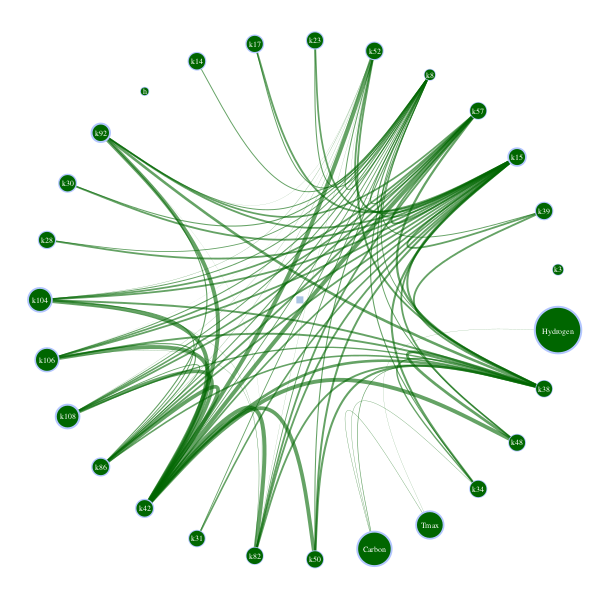

In [4]:
g = nt.build_graph(sa_dict['totaltars'], sens='ST', top=40, min_sens=0.01,
                   edge_cutoff=0.0)
nt.plot_network_circle(g, inline=True)
# test = nt.plot_network_random(g)